In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
import sys
import sounddevice as sd
import soundfile as sf
from pydub import AudioSegment
fs = 44100
onelen = 2
note = [
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [130, 138, 147, 155, 164, 174, 185,196, 207, 220, 233, 246],
    [263, 277, 293, 311, 329, 349, 369, 392, 415, 440, 466, 493, 0],
    [523, 554, 587, 622, 659, 698, 739, 784, 830, 880, 932, 987, 0],
    [1046, 1108, 1174, 1244, 1318, 1396, 1480, 1568, 1661, 1720, 1864, 1975, 0]
]
names = {
    'c': 0,
    'c#': 1,
    'd': 2,
    'd#': 3,
    'e': 4,
    'f': 5,
    'f#': 6,
    'g': 7,
    'g#': 8,
    'a': 9,
    'b': 10,
    'h': 11,
    '-': 12
}

In [2]:
song = [
    [0, '-'], [0, '-'], [0, '-'], [0, '-'], [2, 'd#'],
    [2, 'e'], [0, '-'], [2, 'f#'], [2, 'g'], [0, '-'], [2, 'd#'],
    [2, 'e'], [2, 'f#'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'e'], [2, 'g'], [2, 'h'],
    [2, 'b'], [2, 'h'], [2, 'a'], [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], 
    [0, '-'], [0, '-'], [2, 'd#'], [2, 'e'], [0, '-'], [2, 'f#'], [2, 'g'], [0, '-'], 
    [2, 'd#'], [2, 'e'], [2, 'f#'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'g'], [2, 'h'], [3, 'e'], [3, 'd#'],
    [3, 'e'], [0, '-'], [0, '-'], [2, 'd#'], [2, 'e'], [0, '-'], [2, 'f#'], [2, 'g'], [0, '-'], [2, 'd#'],
    [2, 'e'], [2, 'f#'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'e'], [2, 'g'], [2, 'h'], [2, 'b'],
    [2, 'b'], [2, 'a'], [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [0, '-'], [0, '-'],
    [0, '-'], [3, 'e'], [3, 'd'], [2, 'h'], [2, 'a'], [2, 'g'], [2, 'e'], 
    [2, 'b'], [2, 'a'], [2, 'h'], [2, 'a'], [2, 'h'], [2, 'a'], [2, 'h'], [2, 'a'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [0, '-'], [0, '-'], [3, 'd#'], [3, 'e'], [0, '-'], [3, 'f#'], [3, 'g'],
    [0, '-'], [3, 'd#'], [3, 'e'], [3, 'f#'], [3, 'g'], [4, 'c'], [3, 'h'],
    [3, 'e'], [3, 'g'], [3, 'h'], [3, 'b'],
    [3, 'h'], [3, 'a'], [3, 'g'], [3, 'e'], [3, 'd'], [3, 'e'],
    [3, 'e'], [0, '-'], [0, '-'], [3, 'd#'], [3, 'e'], [0, '-'], [3, 'f#'], [3, 'g'], [0, '-'], 
    [3, 'd#'], [3, 'e'], [3, 'f#'], [3, 'g'], [4, 'c'], [3, 'h'], [3, 'g'], [3, 'h'], [4, 'e'], 
    [4, 'd#'], [4, 'e'], [0, '-'], [0, '-'], [3, 'd#'], [3, 'e'], [0, '-'], [3, 'f#'], [3, 'g'], [0, '-'], 
    [3, 'd#'], [3, 'e'], [3, 'f#'], [3, 'g'], [4, 'c'], [3, 'h'], [3, 'e'], [3, 'g'], [3, 'h'], [3, 'b'],
    [3, 'h'], [3, 'f'], [3, 'g'], [3, 'e'], [3, 'd'], [3, 'e'], [3, 'e'],
    [0, '-'], [0, '-'], [0, '-'], [3, 'e'], [3, 'd'], [2, 'h'], [2, 'f'], [2, 'g'], [2, 'e'],
    [2, 'b'], [2, 'a'], [2, 'h'], [2, 'a'], [2, 'h'], [2, 'a'], [2, 'h'], [2, 'a'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    
    
    [0, '-'], [0, '-'], [2, 'd#'], [2, 'e'], [0, '-'], [2, 'f#'],[2, 'g'], [0, '-'], 
    [2, 'd#'], [2, 'e'], [2, 'f#'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'e'], [2, 'g'], [2, 'h'],
    [2, 'b'], [2, 'h'], [2, 'a'], [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'],
    [0, '-'], [0, '-'], [2, 'd#'], [2, 'e'], [0, '-'], [2, 'f#'], [2, 'g'], [0, '-'],
    [2, 'd#'], [2, 'e'], [2, 'f#'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'a'], [2, 'h'], [3, 'e'], [3, 'd#'],
    [3, 'e'], [0, '-'], [0, '-'], [2, 'd#'], [2, 'e'], [0, '-'], [2, 'f#'], [2, 'g'], [0, '-'], 
    [2, 'd#'], [2, 'e'], [2, 'f#'], [2, 'g'], [3, 'c'], [2, 'h'], [2, 'e'], [2, 'g'], [2, 'h'], 
    [2, 'b'], [2, 'h'], [2, 'a'], [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [0, '-'], [0, '-'],
    [0, '-'], [3, 'e'], [2, 'd'], [2, 'h'], [2, 'a'], [2, 'e'], 
    [2, 'b'], [2, 'a'], [2, 'h'], [2, 'a'], [2, 'h'], [2, 'a'], [2, 'h'], [2, 'a'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],
    [2, 'g'], [2, 'e'], [2, 'd'], [2, 'e'], [2, 'e'], [2, 'e'], [2, 'e'],

    [0, '-']
]

start = [
    0, 0.25, 0.5, 0.75, 0.875,
    1, 1.25, 1.375, 1.5, 1.75, 1.875,
    2, 2.125, 2.25, 2.375, 2.5, 2.625, 2.75, 2.875,
    3, 3.5, 3.5833, 3.6666, 3.75, 3.8333, 3.9163, 4,
    4.5, 4.75, 4.875, 5, 5.25, 5.325, 5.5, 5.75,
    5.825, 6, 6.125, 6.25, 6.375, 6.5, 6.625, 6.75, 6.875, 7,
    8, 8.5, 8.75, 8.825, 9, 9.25, 9.375, 9.5, 9.75, 9.875,
    10, 10.125, 10.25, 10.375, 10.5, 10.625, 10.75, 10.875, 11,
    11.5, 11.5833, 11.6666, 11.75, 11.8333, 11.9163, 12, 12.5, 12.75,
    13, 13.25, 13.375, 13.5, 13.625, 13.75, 13.875, 
    14, 14.125, 14.25, 14.375, 14.5, 14.625, 14.75, 14.875,
    15, 15.0833, 15.1666, 15.25, 15.375, 15.5, 16,
    17, 17.0833, 17.1666, 17.25, 17.275, 17.5, 18,
    19, 19.0833, 19.1666, 19.25, 19.275, 19.5, 20,
    20.5, 20.75, 20.875, 21, 21.25, 21.375, 21.5, 
    21.75, 21.875, 22, 22.125, 22.25, 22.375, 22.5, 
    22.625, 22.75, 22.875, 23,
    23.5, 23.5833, 23.6666, 23.75, 23.8333, 23.9163, 
    24, 24.5, 24.75, 24.875, 25, 25.25, 25.375, 25.5, 25.75, 
    25.875, 26, 26.125, 26.25, 26.375, 26.5, 26.625, 26.75, 26.875, 
    27, 28, 28.5, 28.75, 28.875, 29, 29.25, 29.375, 29.5, 29.75,
    29.875, 30, 30.125, 30.25, 30.375, 30.5, 30.625, 30.75, 30.825, 31,
    31.5, 31.5833, 31.6666, 31.75, 31.875, 31.9163, 32, 
    32.5, 32.75, 33, 33.25, 33.375, 33.5, 33.625, 33.75, 33.875, 
    34, 34.125, 34.25, 34.375, 34.5, 34.625, 34.75, 34.875,
    35, 35.0833, 35.1666, 35.25, 35.375, 35.5, 36, 
    37, 37.0833, 37.1666, 37.25, 37.375, 37.5, 38,
    39, 39.0833, 39.1666, 39.25, 39.375, 39.5, 40,
    
    40.5, 40.75, 40.875, 41, 41.25, 41.375, 41.5, 41.75,
    41.875, 42, 42.125, 42.25, 42.375, 42.5, 42.625, 42.75, 42.875, 43,
    44, 44.5, 44.5833, 44.6666, 44.75, 44.8333, 44.9163, 45, 
    45.5, 45.75, 45.875, 46, 46.25, 46.375, 46.5, 46.75, 
    46.875, 47, 47.125, 47.25, 47.375, 47.5, 47.625, 47.75, 47.875, 48,
    49, 49.5, 49.75, 49.875, 50, 50.25, 50.375, 50.5, 50.75, 
    50.875, 51, 51.125, 51.25, 51.375, 51.5, 51.625, 51.75, 51.875, 
    52, 52.5, 52.5833, 52.6666, 52.75, 52.8333, 52.9163, 53, 53.5, 53.75,
    54, 54.25, 54.375, 54.5, 54.625, 54.75, 54.875, 
    55, 55.125, 55.25, 55.375, 55.5, 55.625, 55.75, 55.875,
    56, 56.0833, 56.1666, 56.25, 56.375, 56.5, 57,
    58, 58.0833, 58.1666, 58.25, 58.375, 58.5, 59,
    60, 60.0833, 60.1666, 60.25, 60.375, 60.5, 61,
    61.5
]

durations = [
    0.25, 0.25, 0.25, 0.125, 0.125,
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125,
    0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    0.5, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5, 
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125,
    0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 1,
    0.5, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 
    0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.5,
    0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5, 0.25, 0.25,
    0.25, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    0.0625, 0.125, 0.0625, 0.125, 0.0625, 0.125, 0.0625, 0.125,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 1,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 1,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 0.5,
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25,
    0.125, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25,
    0.125, 0.25, 0.125, 0.5,
    0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 
    0.5, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125,
    0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    1, 0.5, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125,
    0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.5,
    0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5, 
    0.25, 0.25, 0.25, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    0.0625, 0.125, 0.0625, 0.125, 0.0625, 0.125, 0.0625, 0.125,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 1,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 1,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 0.5,
    
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125, 
    0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    0.5, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5,
    0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125, 
    0.125, 0.25, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 1,
    0.5, 0.25, 0.125, 0.125, 0.25, 0.125, 0.125, 0.25, 0.125,
    0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125,
    0.5, 0.125, 0.125, 0.125, 0.125, 0.125, 0.125, 0.5, 0.25, 0.25,
    0.25, 0.25, 0.125, 0.25, 0.125, 0.25, 0.125, 
    0.0625, 0.125, 0.0625, 0.125, 0.0625, 0.125, 0.0625, 0.125, 
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 1,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 1,
    0.125, 0.125, 0.125, 0.25, 0.125, 0.5, 0.5,
    
    
    0.1
]
print(len(song), len(start), len(durations))


323 325 323


In [3]:
data = np.ndarray(int(fs * start[len(start) - 1] * onelen))
cnt = np.ndarray(int(fs * start[len(start) - 1] * onelen))
print(len(data))

5424300


In [4]:
def play(start, rate, dur):
    SZ = int(fs * dur)
    while (rate * SZ) % fs != 0:
        SZ += 1
    volume = 1
    for i in range(0, SZ):
        data[start + i] += volume * math.sin(2 * math.pi * i * rate / fs)
        cnt[start + i] += 1
        volume -= 1 / SZ

In [5]:
for i in range(0, len(song) - 1):
    play(int(start[i] * onelen * fs), note[song[i][0]][names[song[i][1]]], durations[i] * onelen)
_max = -100
for _ in data:
    _max = max(_max, _)
for i in range(0, len(data)):
    data[i] /= _max
    #data[i] = min(data[i], 1)
    #data[i] = max(data[i], -1)

In [6]:
sf.write(data = data, file='pink_panther.wav', samplerate=fs)
AudioSegment.from_wav('pink_panther.wav').export('pink_panther.mp3', format='mp3')

<_io.BufferedRandom name='pink_panther.mp3'>

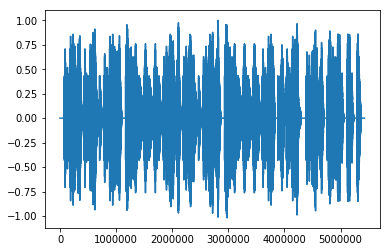

In [7]:
fig = plt.figure()
plt.plot(data)
plt.show()
fig.savefig('output.png')

In [8]:
#data = np.append(data, data)
sd.play(data, fs)
sd.wait()